In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import pickle as pkl

# Cartpole with LQR fixed R

In [ ]:
!python3 cartpole_lqr.py --path 'data_LQR' --seed 0

In [6]:
with open('data_LQR/state_seq.pkl', 'rb') as f:
    data = pkl.load(f)

state_df = pd.DataFrame(data[:200, :], columns = ['position', 'velocity', 'angle', 'angular_velocity'])
convergence_index = state_df[((state_df.map(lambda x: np.abs(x)) - 0.003) < 0).all(axis=1)].index[0]
print(f'Convergence reached at timestep {convergence_index}')

Convergence reached at timestep 180


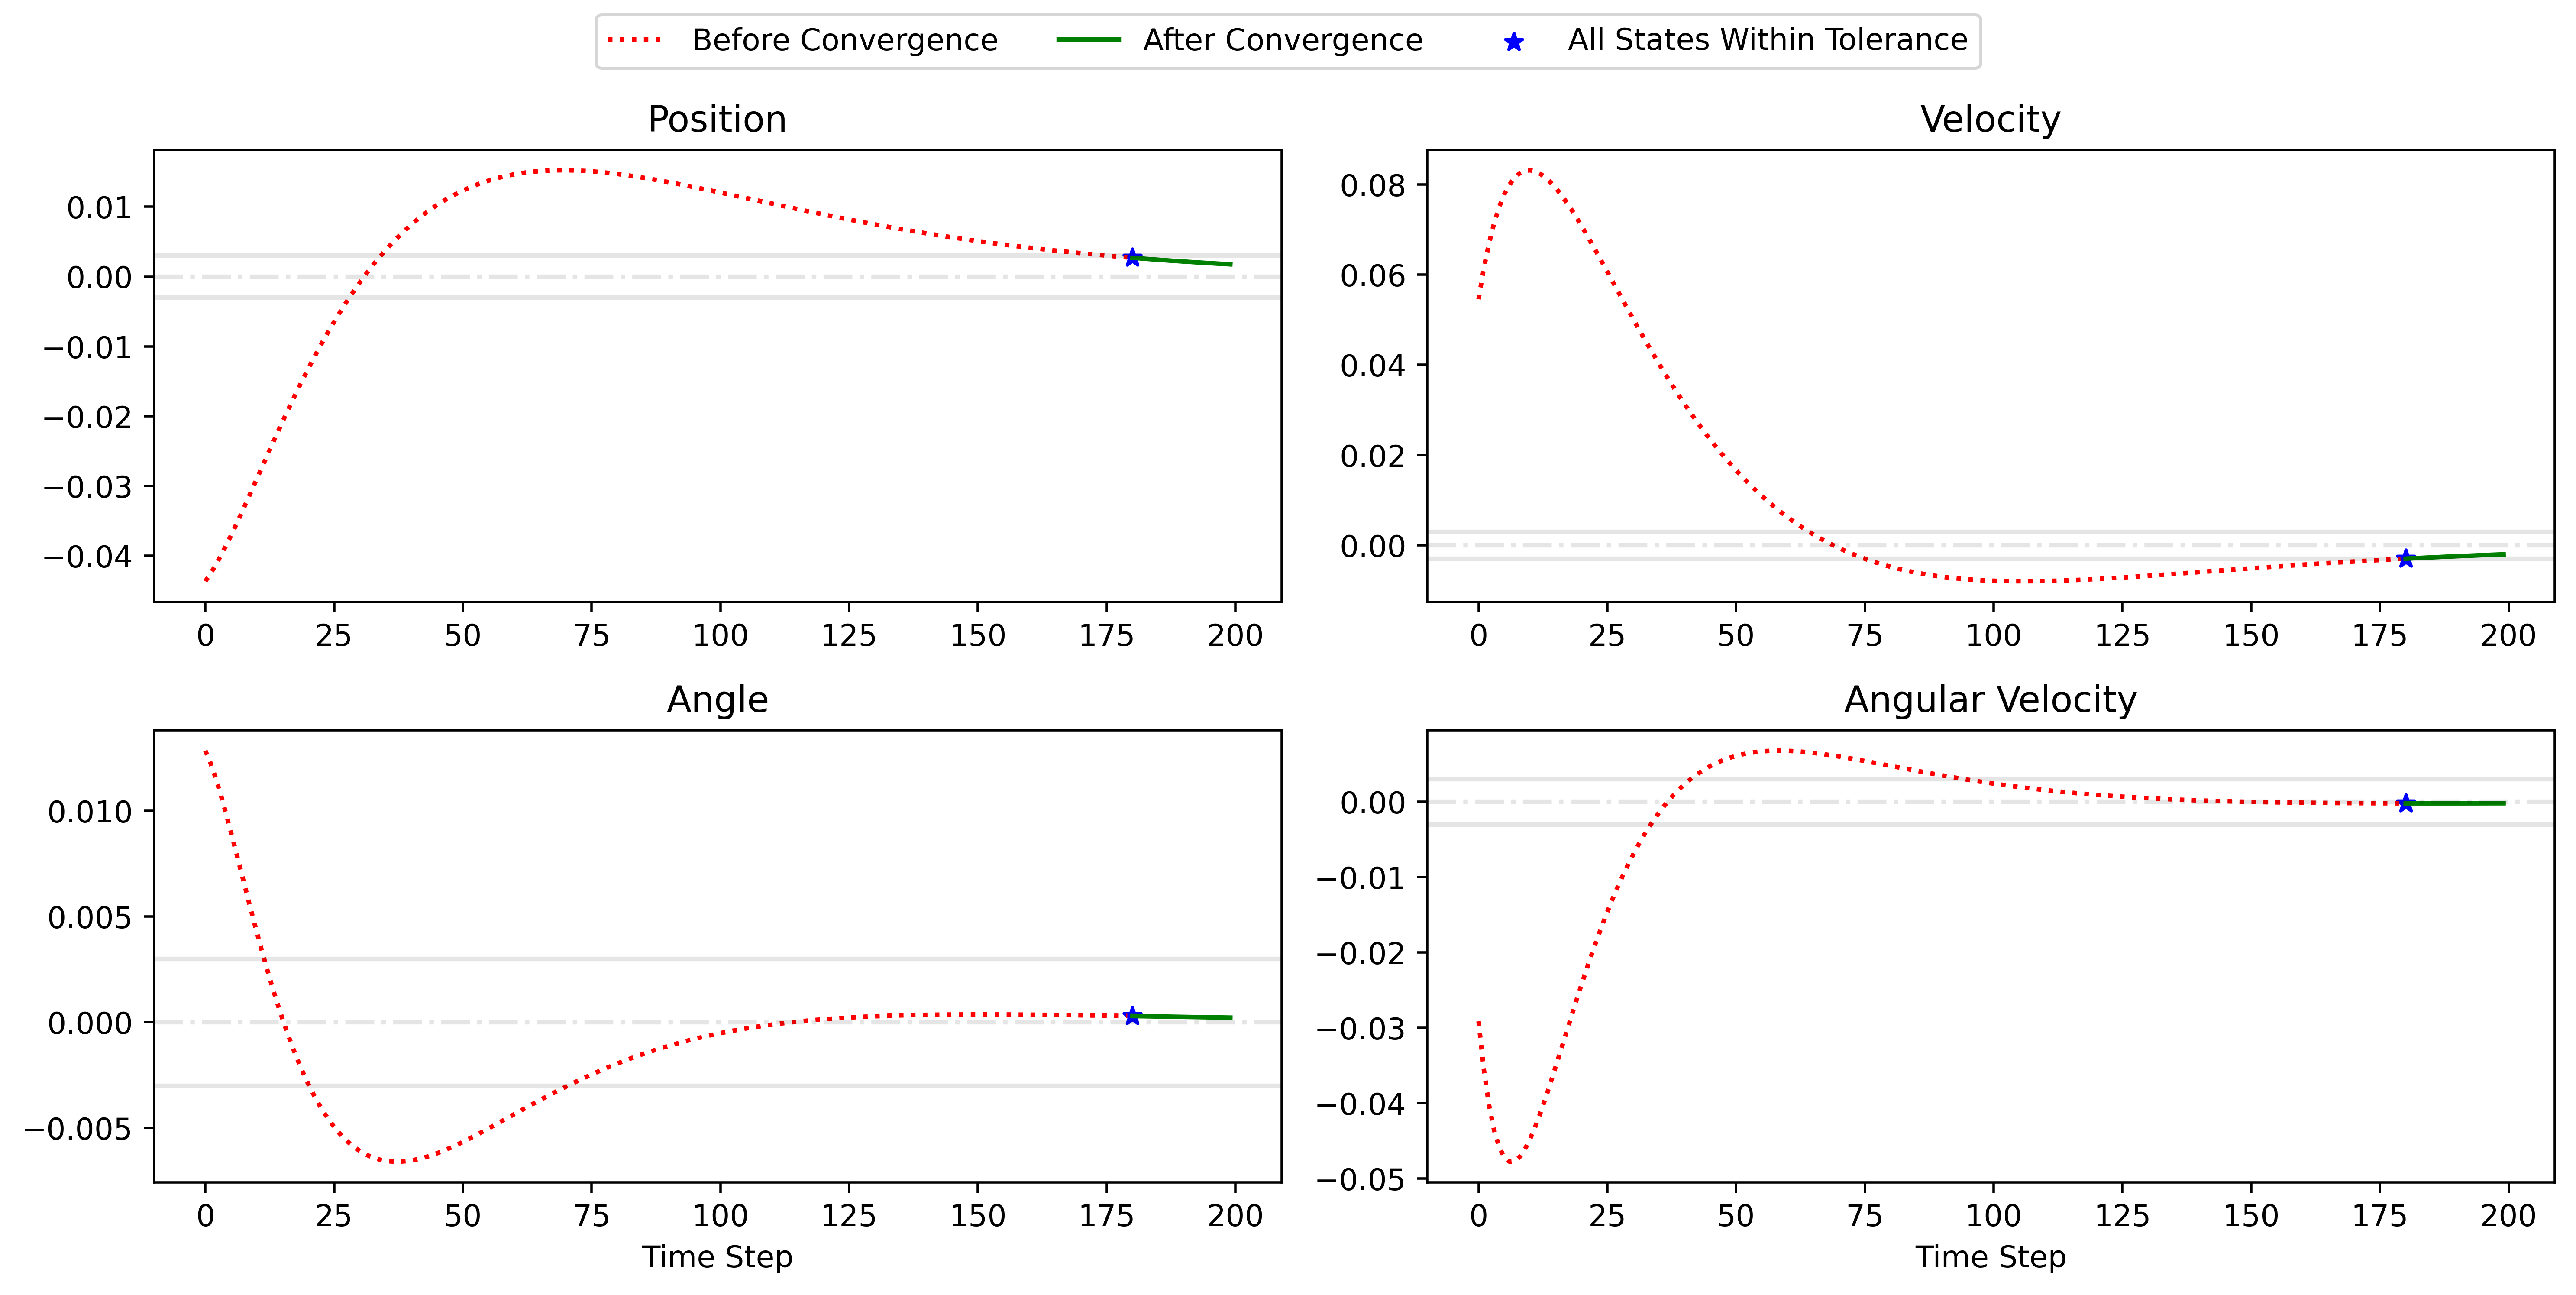

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(12, 6), dpi = 500)

ax[0, 0].plot(state_df['position'][:convergence_index], color='red', linestyle='dotted', label='Before Convergence')
ax[0, 0].plot(state_df['position'][convergence_index:], color='green', label = 'After Convergence')
ax[0, 0].axhline(0, color='black', linestyle='dashdot', alpha = 0.1)
ax[0, 0].axhline(0.003, color='black', linestyle='-', alpha = 0.1)
ax[0, 0].axhline(-0.003, color='black', linestyle='-', alpha = 0.1)
ax[0, 0].scatter(convergence_index, state_df.loc[convergence_index]['position'], color='blue', marker='*', label='All States Within Tolerance')
ax[0, 0].set_title('Position')

ax[0, 1].plot(state_df['velocity'][:convergence_index], color='red', linestyle='dotted', label='Before Convergence')
ax[0, 1].plot(state_df['velocity'][convergence_index:], color='green', label = 'After Convergence')
ax[0, 1].axhline(0, color='black', linestyle='dashdot', alpha = 0.1)
ax[0, 1].axhline(0.003, color='black', linestyle='-', alpha = 0.1)
ax[0, 1].axhline(-0.003, color='black', linestyle='-', alpha = 0.1)
ax[0, 1].scatter(convergence_index, state_df.loc[convergence_index]['velocity'], color='blue', marker='*', label='All States Within Tolerance')
ax[0, 1].set_title('Velocity')

ax[1, 0].plot(state_df['angle'][:convergence_index], color='red', linestyle='dotted', label='Before Convergence')
ax[1, 0].plot(state_df['angle'][convergence_index:], color='green', label = 'After Convergence')
ax[1, 0].axhline(0, color='black', linestyle='dashdot', alpha = 0.1)
ax[1, 0].axhline(0.003, color='black', linestyle='-', alpha = 0.1)
ax[1, 0].axhline(-0.003, color='black', linestyle='-', alpha = 0.1)
ax[1, 0].scatter(convergence_index, state_df.loc[convergence_index]['angle'], color='blue', marker='*', label='All States Within Tolerance')
ax[1, 0].set_title('Angle')

ax[1, 1].plot(state_df['angular_velocity'][:convergence_index], color='red', linestyle='dotted', label='Before Convergence')
ax[1, 1].plot(state_df['angular_velocity'][convergence_index:], color='green', label = 'After Convergence')
ax[1, 1].axhline(0, color='black', linestyle='dashdot', alpha = 0.1)
ax[1, 1].axhline(0.003, color='black', linestyle='-', alpha = 0.1)
ax[1, 1].axhline(-0.003, color='black', linestyle='-', alpha = 0.1)
ax[1, 1].scatter(convergence_index, state_df.loc[convergence_index]['angular_velocity'], color='blue', marker='*', label='All States Within Tolerance')
ax[1, 1].set_title('Angular Velocity')

ax[1, 0].set_xlabel('Time Step')
ax[1, 1].set_xlabel('Time Step')

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncols = 3)
fig.tight_layout(rect=(0,0,1,0.95))


# Cartpole with LQR varying R

In [ ]:
!python3 cartpole_lqr.py --path 'data_LQR' --mode multiple_R

In [2]:
np_data = np.empty((0, 7))
for R in ['0.01', '0.1', '1', '10', '100']:
    with open('data_LQR/state_force_seq_R_' + R + '.pkl', 'rb') as f:
        state_forces_data = pkl.load(f)
    if state_forces_data[0, 4] < 0:
        state_forces_data[:, 4] = -state_forces_data[:, 4] 
    np_data = np.vstack((np_data, state_forces_data))

state_forces_df = pd.DataFrame(np_data, columns = ['position', 'velocity', 'angle', 'angular_velocity', 'force', 'abs_force', 'R'])

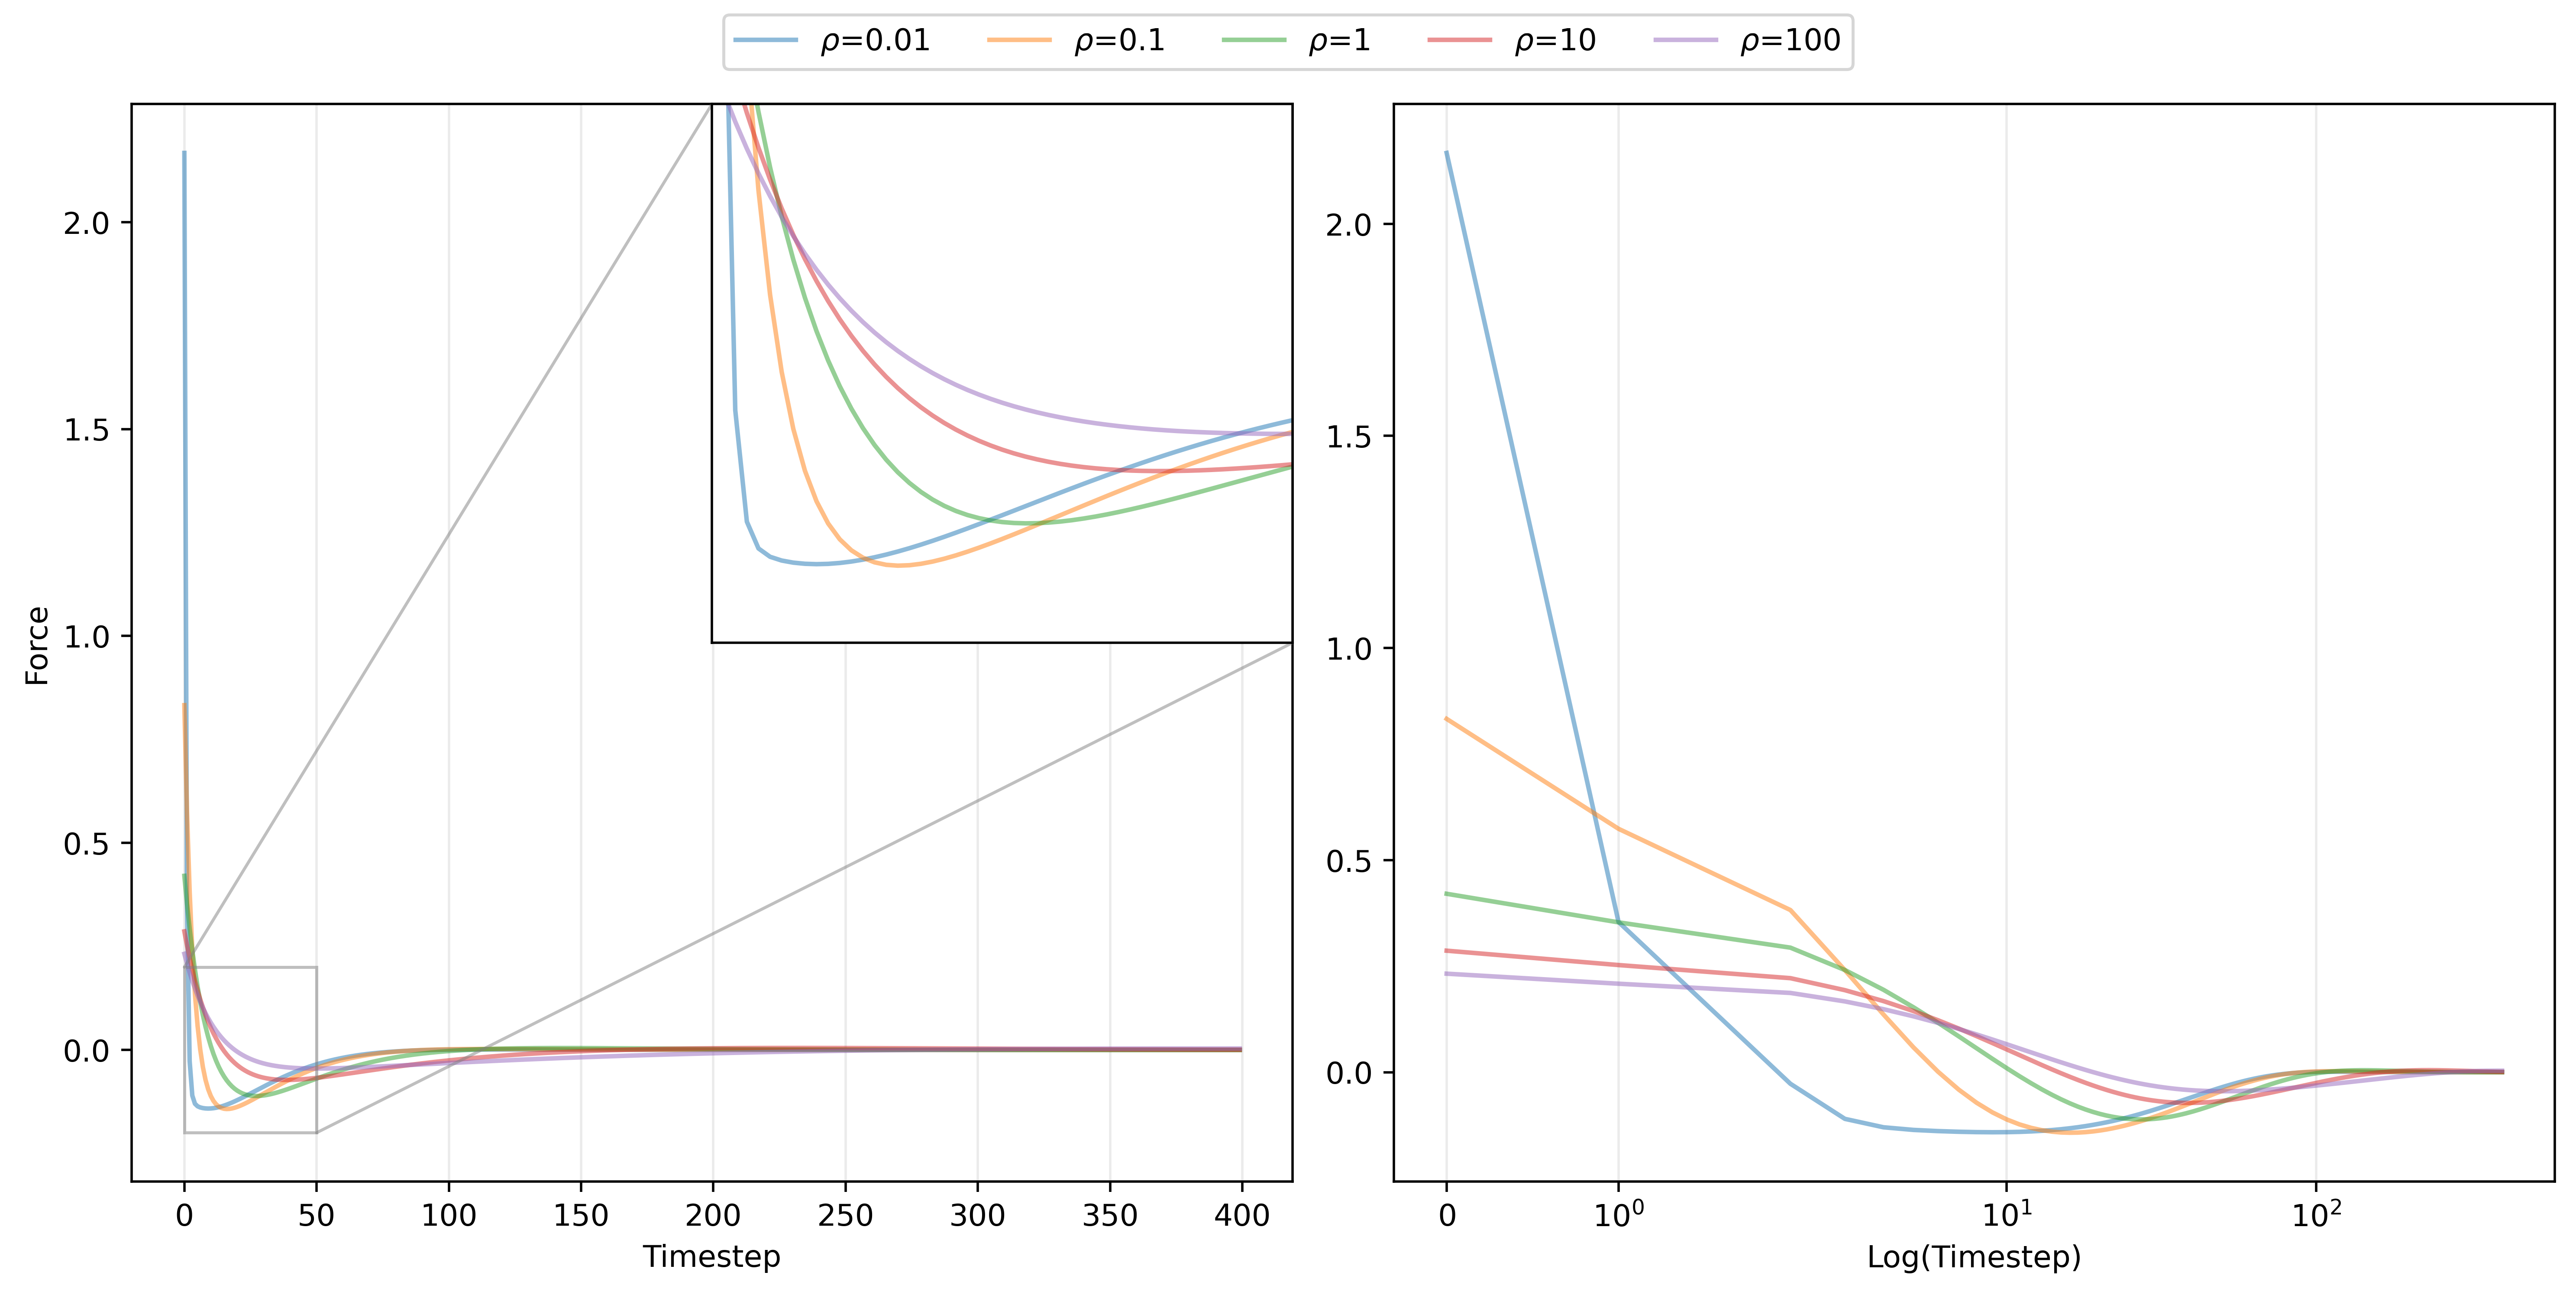

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), dpi = 500)

x_range = list(range(0, 400))

for R in [0.01, 0.1, 1, 10, 100]:
    ax[0].plot(x_range, state_forces_df[state_forces_df['R'] == R]['force'], label=r'$\rho$=' + str(R), alpha = 0.5)
    ax[1].plot(x_range, state_forces_df[state_forces_df['R'] == R]['force'], label=r'$\rho$=' + str(R), alpha = 0.5)

x1, x2, y1, y2 = 0, 50, -0.2, 0.2
axins = ax[0].inset_axes([0.5, 0.5, 0.5, 0.5], xlim = (x1, x2), ylim = (y1, y2), xticklabels=[], yticklabels=[])
for R in [0.01, 0.1, 1, 10, 100]:
    axins.plot(x_range, state_forces_df[state_forces_df['R'] == R]['force'], alpha = 0.5)

axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.tick_params(bottom=False, left=False)

ax[0].indicate_inset_zoom(axins)
ax[1].set_xscale('symlog')

ax[0].set_ylabel('Force')
ax[0].set_xlabel('Timestep')
ax[0].grid(axis='x', alpha = 0.25)
ax[1].set_xlabel('Log(Timestep)')
ax[1].grid(axis='x', alpha = 0.25)

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncols = 5)
fig.tight_layout(rect=(0,0,1,0.95))

# Cartpole with RL

In [ ]:
!python3 cartpole_rl.py --train_episodes 500 --max_timesteps 500 --path 'models/default_reward' --reward_type 'default'

Environment: CartPole-v0
Training device: mps
Observation space dimensions: 4
Action space dimensions: 2
Episode 0 finished. Total reward: 17 (17 timesteps)
Model saved to tmp/CartPole-v0_params_default_early_500.ai
Episode 1 finished. Total reward: 12 (12 timesteps)
Episode 2 finished. Total reward: 12 (12 timesteps)
Episode 3 finished. Total reward: 13 (13 timesteps)
Episode 4 finished. Total reward: 20 (20 timesteps)
Model saved to tmp/CartPole-v0_params_default_early_500.ai
Episode 5 finished. Total reward: 16 (16 timesteps)
Episode 6 finished. Total reward: 12 (12 timesteps)
Episode 7 finished. Total reward: 14 (14 timesteps)
Episode 8 finished. Total reward: 28 (28 timesteps)
Model saved to tmp/CartPole-v0_params_default_early_500.ai
Episode 9 finished. Total reward: 27 (27 timesteps)
Episode 10 finished. Total reward: 29 (29 timesteps)
Model saved to tmp/CartPole-v0_params_default_early_500.ai
Episode 11 finished. Total reward: 27 (27 timesteps)
Episode 12 finished. Total reward

In [ ]:
!python3 multiple_cartpoles_rl.py --episode_steps 500 --reward_type 'default' --num_runs 30 --path 'models/30_runs'

In [ ]:
!python3 cartpole_rl.py --train_episodes 500 --max_timesteps 500 --path 'models/random_policy' --reward_type 'default' --random_policy

In [4]:
with open('models/30_runs/rewards_30_runs_policy.pkl', 'rb') as f:
    data_policy = pkl.load(f)

with open('models/30_runs/rewards_30_runs_random.pkl', 'rb') as f:
    data_random = pkl.load(f)

with open('models/30_runs/different_timesteps_data/rewards_50.pkl', 'rb') as f:
    data_50_steps = pkl.load(f)

with open('models/30_runs/different_timesteps_data/rewards_100.pkl', 'rb') as f:
    data_100_steps = pkl.load(f)

with open('models/30_runs/different_timesteps_data/rewards_200.pkl', 'rb') as f:
    data_200_steps = pkl.load(f)

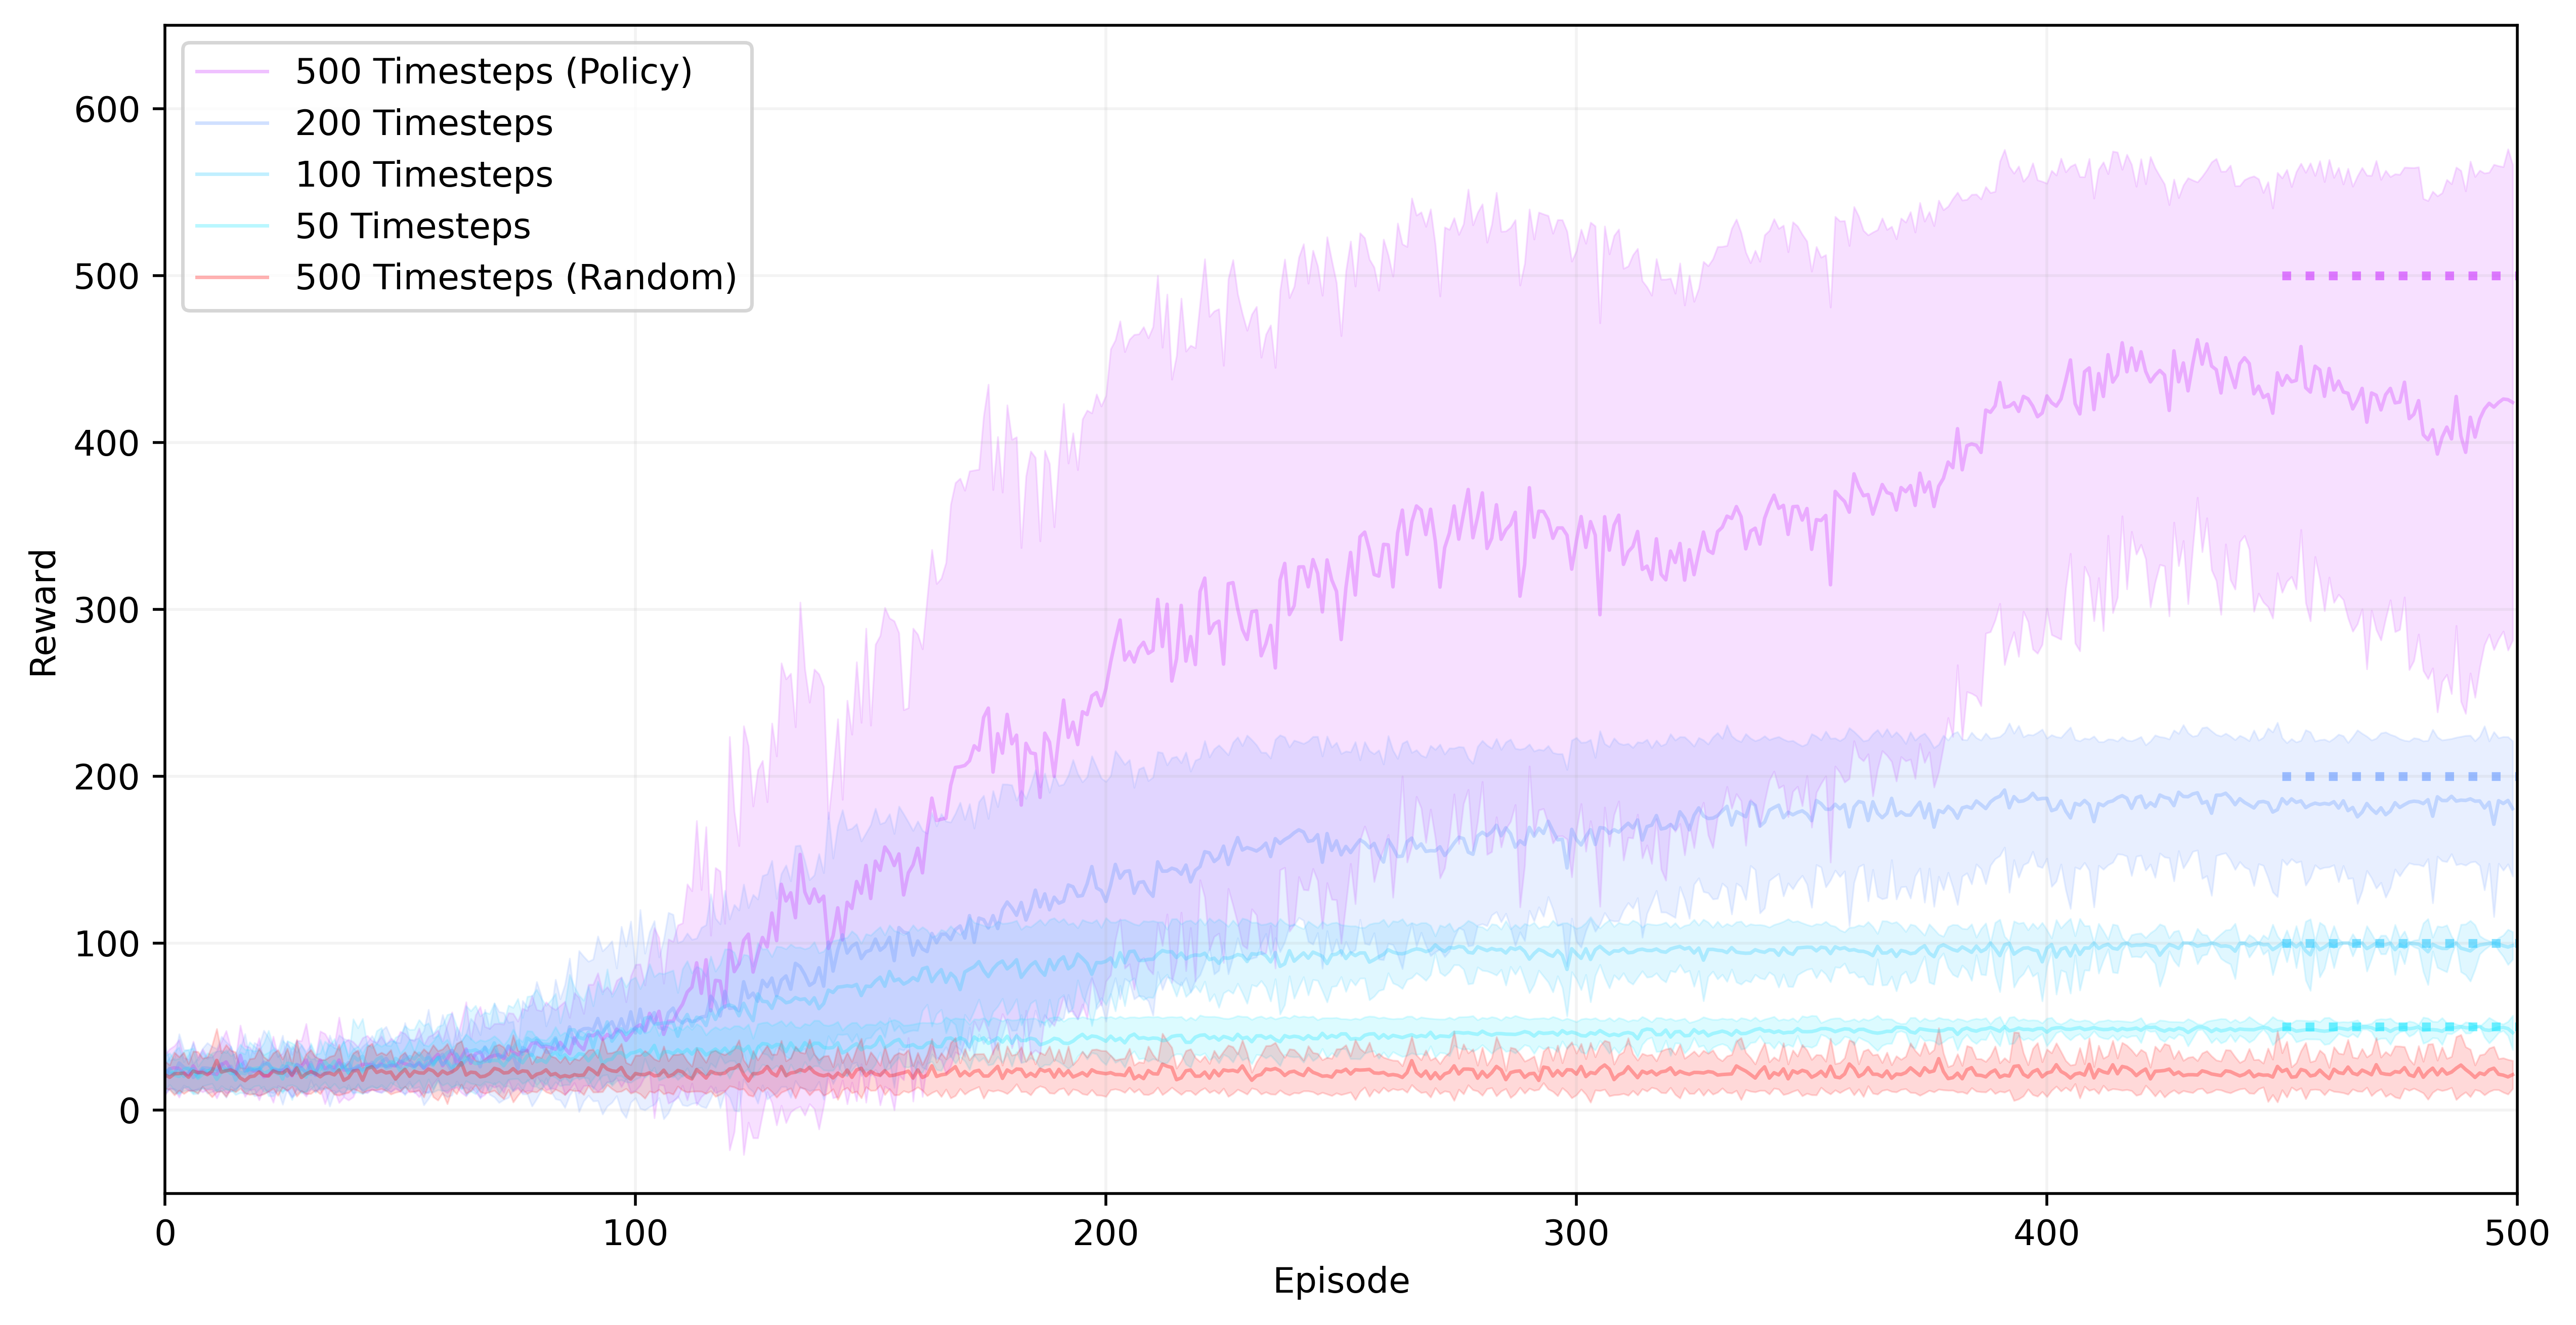

In [5]:
def get_color(c, timestep):
    cmap = plt.get_cmap(c)
    return cmap(timestep / 500)

fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi = 500)

cmap = 'cool'

def plot_curves(data, ax, color, label):

    episodes = data['episode'].unique()
    mean_rewards = []
    reward_variances = []

    for episode in episodes:
        rewards = data[data['episode'] == episode]['reward']
        mean_rewards.append(np.mean(rewards))
        reward_variances.append(np.var(rewards))

    mean_rewards = np.array(mean_rewards)
    reward_variances = np.array(reward_variances)
    reward_std = np.sqrt(reward_variances)

    ax.plot(episodes, 
            mean_rewards, 
            color=color, 
            alpha=0.3,
            label=label,
            linewidth = 1)

    ax.fill_between(episodes,
                    mean_rewards + reward_std,
                    mean_rewards - reward_std,
                    color=color,
                    alpha=0.15,
                    linewidth = 0.5)

plot_curves(data_policy, ax, get_color(cmap, 400), '500 Timesteps (Policy)')
plot_curves(data_200_steps, ax, get_color(cmap, 200), '200 Timesteps')
plot_curves(data_100_steps, ax, get_color(cmap, 100), '100 Timesteps')
plot_curves(data_50_steps, ax, get_color(cmap, 50), '50 Timesteps')
plot_curves(data_random, ax, 'red', '500 Timesteps (Random)')

ax.axhline(500, xmin = 0.9, xmax = 1, color=get_color(cmap, 400), linestyle='dotted', alpha = 0.6, linewidth = 2.5)
ax.axhline(200, xmin = 0.9, xmax = 1, color=get_color(cmap, 200), linestyle='dotted', alpha = 0.6, linewidth = 2.5)
ax.axhline(100, xmin = 0.9, xmax = 1, color=get_color(cmap, 100), linestyle='dotted', alpha = 0.6, linewidth = 2.5)
ax.axhline(50, xmin = 0.9, xmax = 1, color=get_color(cmap, 50), linestyle='dotted', alpha = 0.6, linewidth = 2.5)

ax.set_xlim(0, 500)
ax.set_ylim(-50, 650)
ax.legend()
ax.grid(alpha = 0.15)
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')

plt.show()

# Cartpole with RL and custom reward functions

In [ ]:
!python3 cartpole_rl.py --path 'models/custom_reward' --max_timesteps 750 --train_episodes 1000 --reward_type 0

In [ ]:
!python3 cartpole_rl.py --path 'models/custom_reward' --max_timesteps 1000 --train_episodes 2750 --reward_type -1.5

In [ ]:
!python3 cartpole_rl.py --path 'models/custom_reward' --max_timesteps 2500 --train_episodes 2750

In [ ]:
folder_path = 'models/custom_reward/data_custom_reward'

data = pd.DataFrame(columns = ['episode', 'train_run_id', 'reward', 'mean_reward'])

for (i, filename) in enumerate(os.listdir(folder_path)):
    file_path = os.path.join(folder_path, filename)
    tmp = pd.read_pickle(file_path)
    tmp['train_run_id'] = i
    data = pd.concat((data, tmp), axis = 0)

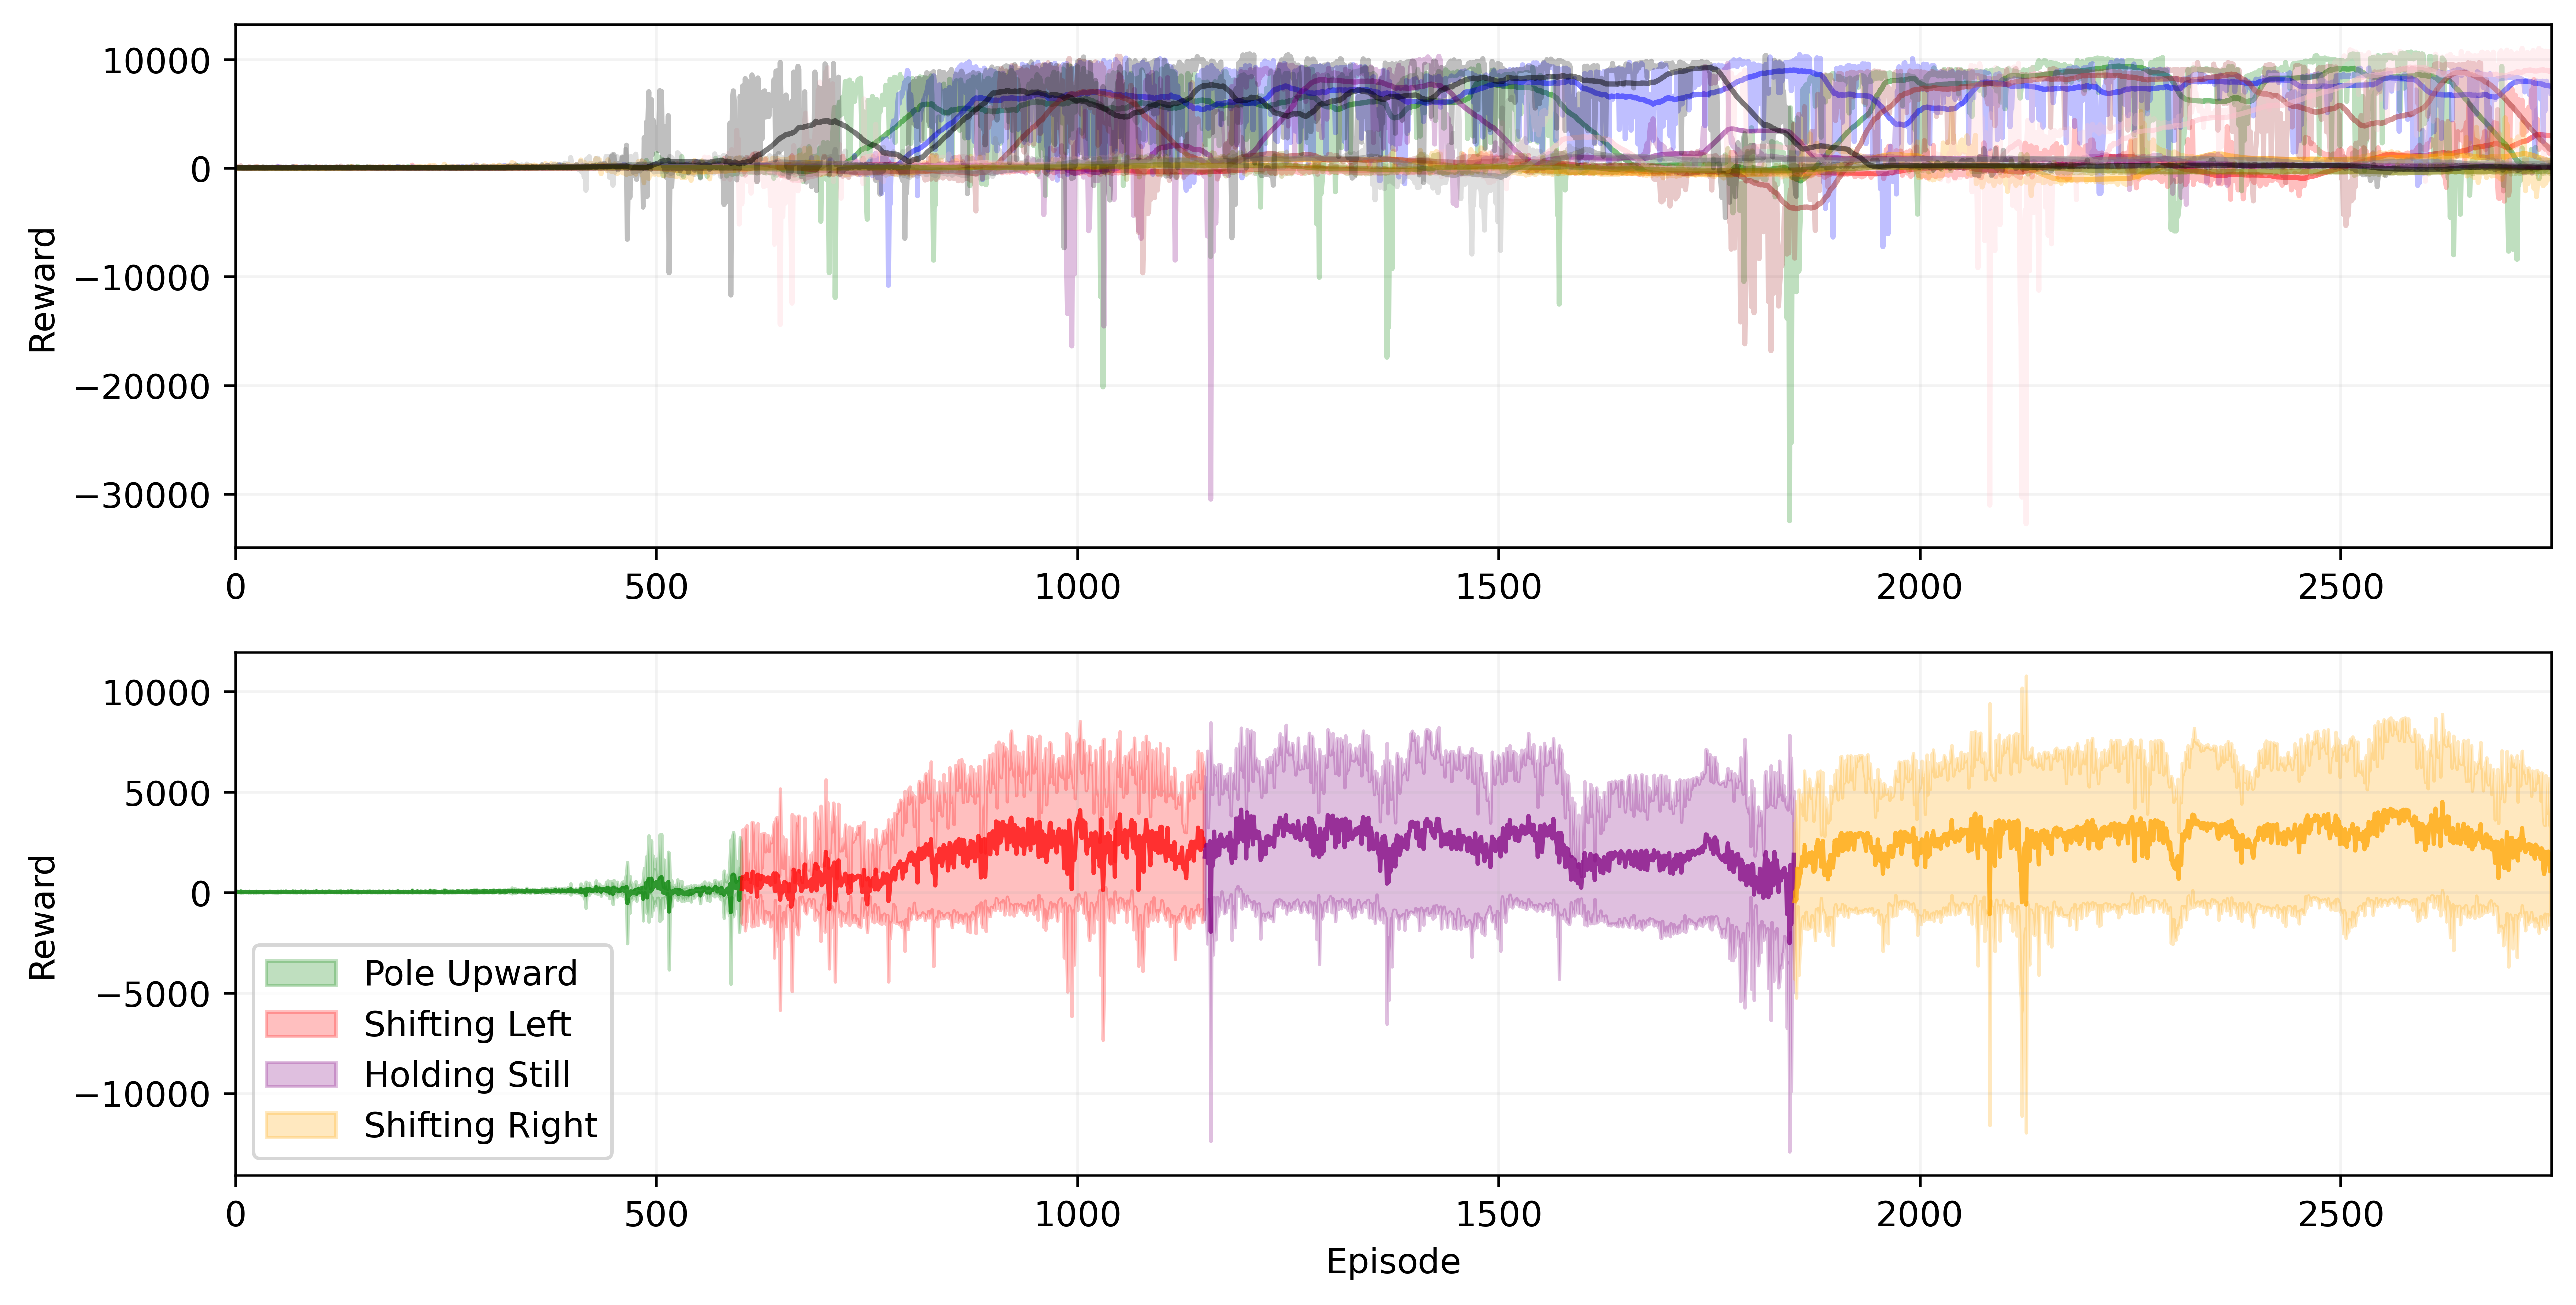

In [13]:
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'black']
episodes = np.array(data['episode'].unique(), dtype=int)
mean_rewards = []
reward_variances = []

for episode in episodes:
    rewards = data[data['episode'] == episode]['reward']
    mean_rewards.append(np.mean(rewards))
    reward_variances.append(np.var(rewards))

mean_rewards = np.array(mean_rewards)
reward_variances = np.array(reward_variances)
reward_std = np.sqrt(reward_variances)


fig, ax = plt.subplots(2, 1, figsize=(12, 6), dpi = 500)

for i in range(10):
    ax[0].plot(data[data['train_run_id'] == i]['episode'], 
               data[data['train_run_id'] == i]['reward'],
               alpha = 0.25,
               c = colors[i],
               label='Run ' + str(i))
    
    ax[0].plot(data[data['train_run_id'] == i]['episode'], 
               data[data['train_run_id'] == i]['mean_reward'],
               alpha = 0.5,
               c = colors[i])

ax[1].plot(episodes[episodes <= 600], mean_rewards[episodes <= 600], color='green', alpha=0.75, linewidth = 1.25)
ax[1].plot(episodes[(episodes > 600) & (episodes <= 1150)], mean_rewards[(episodes > 600) & (episodes <= 1150)], color='red', alpha=0.75, linewidth = 1.25)
ax[1].plot(episodes[(episodes > 1150) & (episodes <= 1850)], mean_rewards[(episodes > 1150) & (episodes <= 1850)], color='purple', alpha=0.75, linewidth = 1.25)
ax[1].plot(episodes[(episodes > 1850) & (episodes <= 2750)], mean_rewards[(episodes > 1850) & (episodes <= 2750)], color='orange', alpha=0.75, linewidth = 1.25)

ax[1].fill_between(episodes[episodes <= 600],
                mean_rewards[episodes <= 600] + reward_std[episodes <= 600],
                mean_rewards[episodes <= 600] - reward_std[episodes <= 600],
                color='green',
                alpha=0.25,
                label='Pole Upward')

ax[1].fill_between(episodes[(episodes > 600) & (episodes <= 1150)],
                mean_rewards[(episodes > 600) & (episodes <= 1150)] + reward_std[(episodes > 600) & (episodes <= 1150)],
                mean_rewards[(episodes > 600) & (episodes <= 1150)] - reward_std[(episodes > 600) & (episodes <= 1150)],
                color='red',
                alpha=0.25,
                label='Shifting Left')

ax[1].fill_between(episodes[(episodes > 1150) & (episodes <= 1850)],
                mean_rewards[(episodes > 1150) & (episodes <= 1850)] + reward_std[(episodes > 1150) & (episodes <= 1850)],
                mean_rewards[(episodes > 1150) & (episodes <= 1850)] - reward_std[(episodes > 1150) & (episodes <= 1850)],
                color='purple',
                alpha=0.25,
                label='Holding Still')

ax[1].fill_between(episodes[(episodes > 1850) & (episodes <= 2750)],
                mean_rewards[(episodes > 1850) & (episodes <= 2750)] + reward_std[(episodes > 1850) & (episodes <= 2750)],
                mean_rewards[(episodes > 1850) & (episodes <= 2750)] - reward_std[(episodes > 1850) & (episodes <= 2750)],
                color='orange',
                alpha=0.25,
                label='Shifting Right')

ax[0].grid(alpha = 0.15)
ax[0].set_ylabel('Reward')
ax[0].set_xlim(0, 2750)
ax[1].grid(alpha = 0.15)
ax[1].set_xlabel('Episode')
ax[1].set_ylabel('Reward')
ax[1].legend(loc='lower left')
ax[1].set_xlim(0, 2750)

plt.show()

In [14]:
with open('models/custom_reward/example_run/example_slide_run.pkl', 'rb') as f:
    data = pkl.load(f)

data['x_avg'] = data['x'].rolling(window=5).mean()
data['x_dot_avg'] = data['x_dot'].rolling(window=5).mean()
data['theta_avg'] = data['theta'].rolling(window=5).mean()
data['theta_dot_avg'] = data['theta_dot'].rolling(window=5).mean()
data['action_avg'] = data['action'].rolling(window=10).mean()

avg_data = data.groupby(data.index).mean()
avg_data['cum_reward'] = avg_data['reward'].cumsum()

/var/folders/h3/8dndlp3j6nd6wc7lltq1hymw0000gn/T/ipykernel_2756/3668445006.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2, 0].yaxis.set_ticklabels(['$-10^1$', '$-10^0$', '', '$10^0$', '$10^1$', '$10^2$', '$10^3$', '$10^4$'])


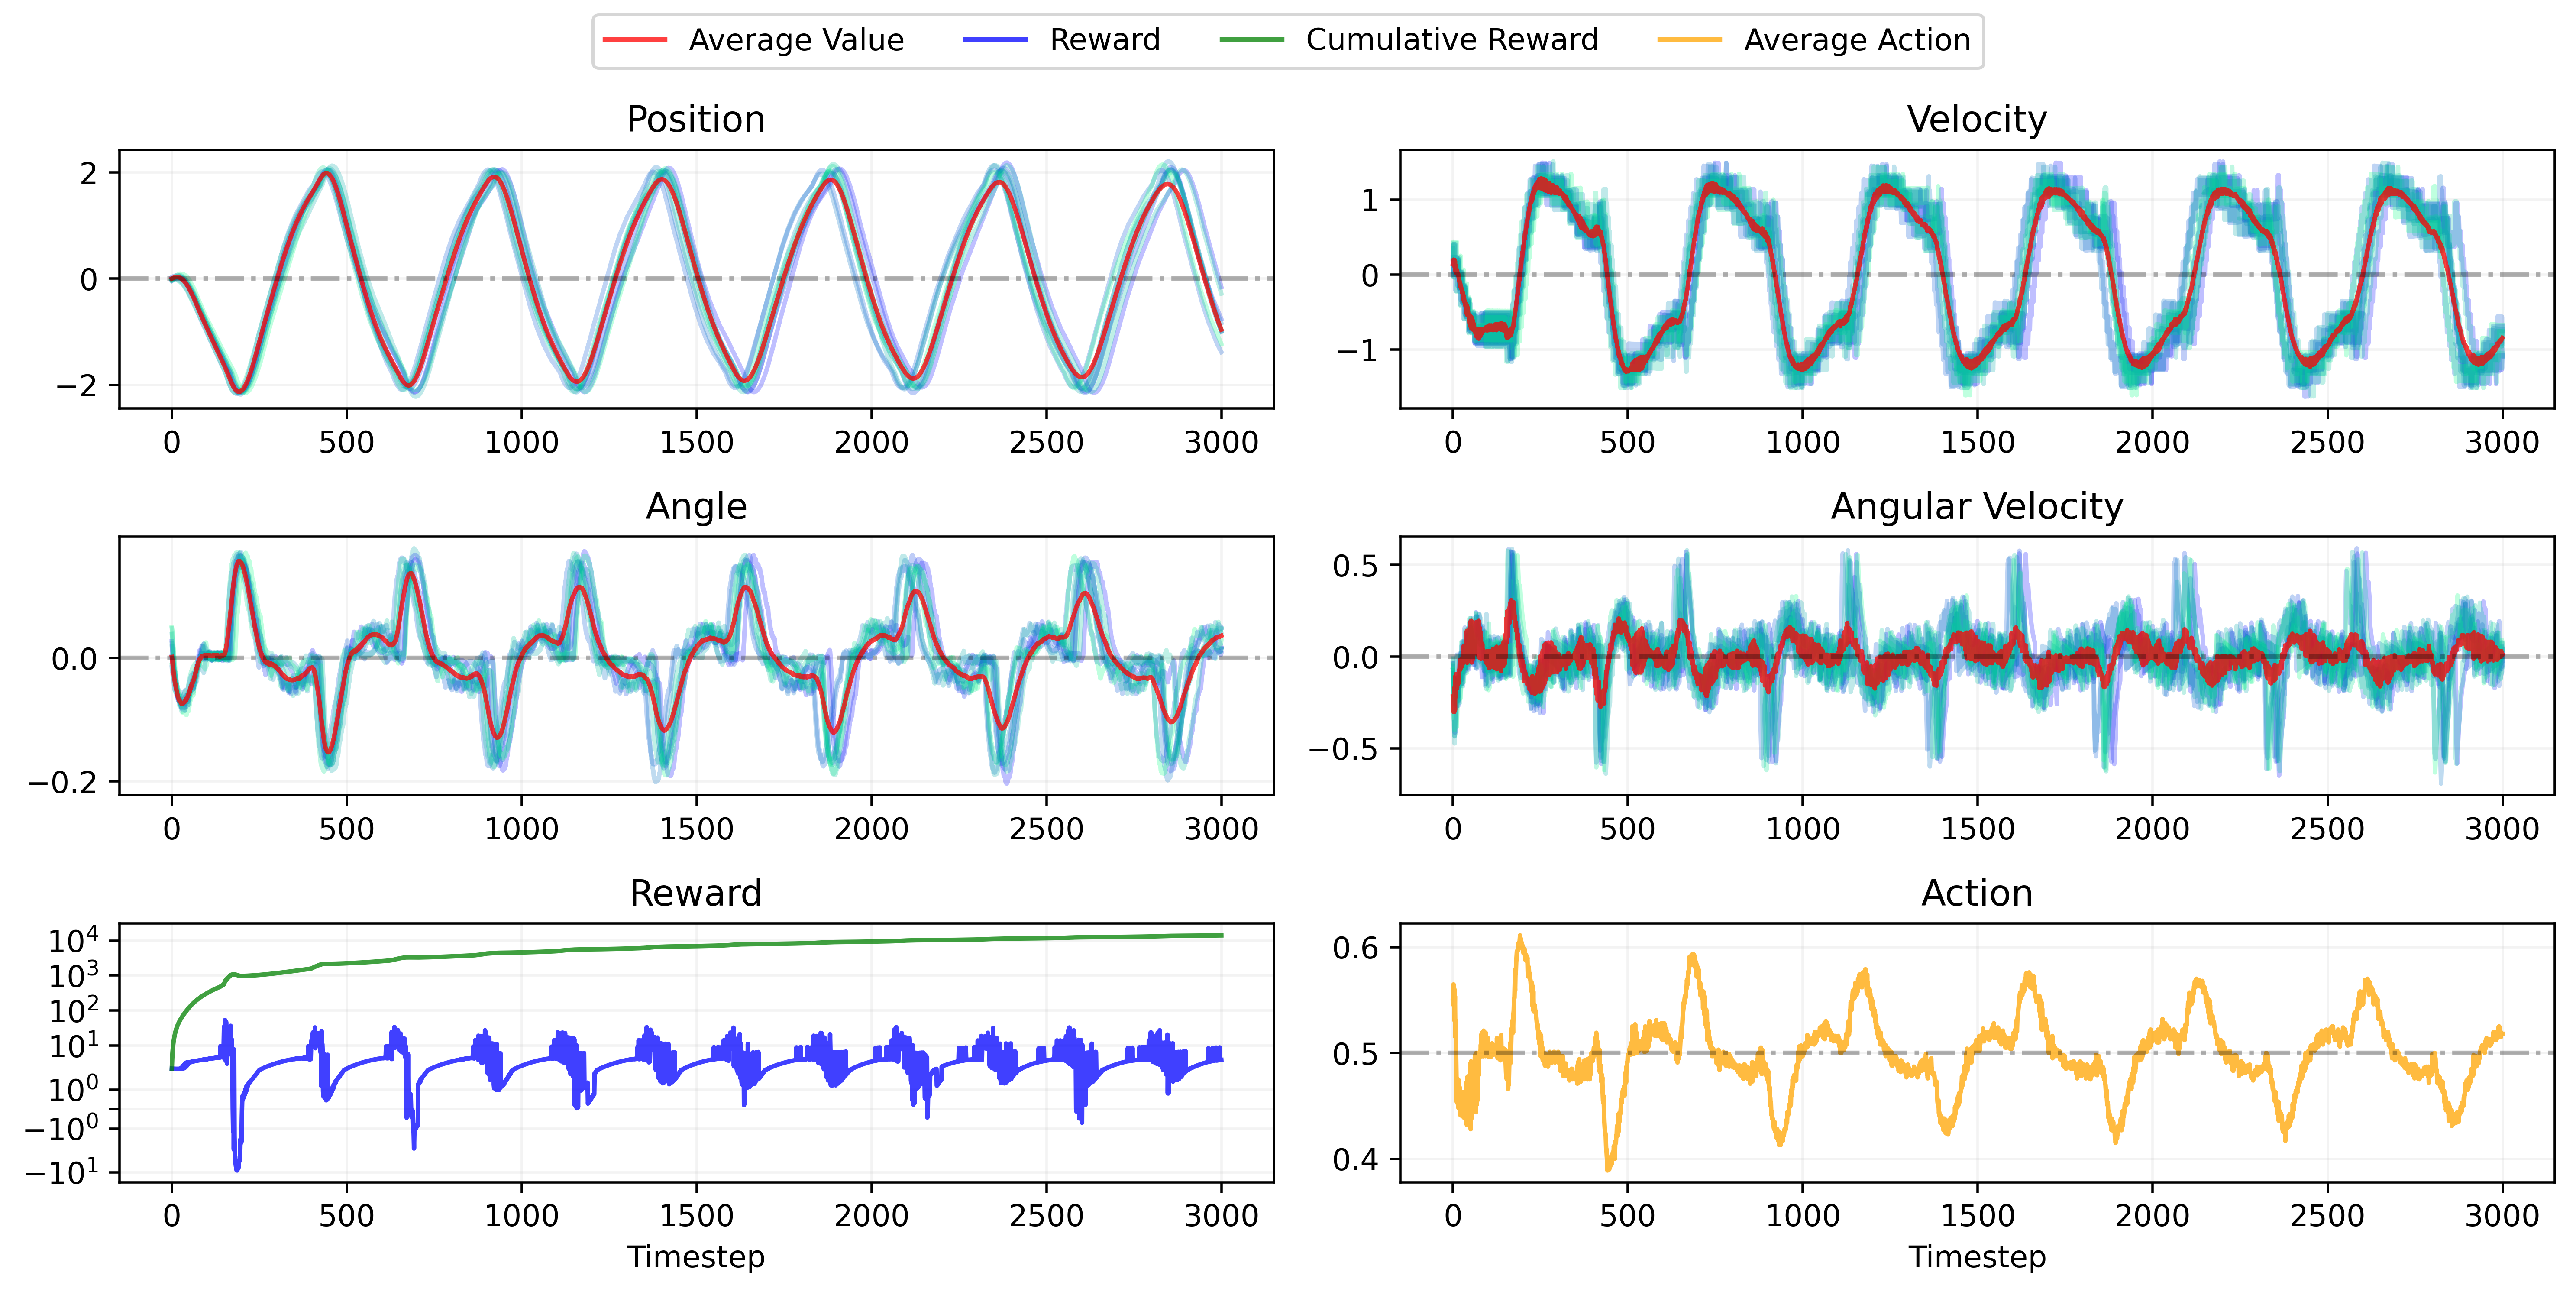

In [15]:
fig, ax = plt.subplots(3, 2, figsize=(12, 6), dpi = 500)
cmap = plt.get_cmap('winter')

norm = matplotlib.colors.Normalize(vmin=0.0, vmax=9.0)

for ep in range(10):
    ax[0, 0].plot(data[data['episode'] == ep].index, data[data['episode'] == ep]['x'], alpha = 0.25, c = cmap(norm(ep)))
    ax[0, 1].plot(data[data['episode'] == ep].index, data[data['episode'] == ep]['x_dot'], alpha = 0.25, c = cmap(norm(ep)))
    ax[1, 0].plot(data[data['episode'] == ep].index, data[data['episode'] == ep]['theta'], alpha = 0.25, c = cmap(norm(ep)))
    ax[1, 1].plot(data[data['episode'] == ep].index, data[data['episode'] == ep]['theta_dot_avg'], alpha = 0.25, c = cmap(norm(ep)))

ax[0, 0].plot(avg_data.index, avg_data['x'], c = 'red', alpha = 0.75, label = 'Average Value')
ax[0, 1].plot(avg_data.index, avg_data['x_dot'], c = 'red', alpha = 0.75)
ax[1, 0].plot(avg_data.index, avg_data['theta'], c = 'red', alpha = 0.75)
ax[1, 1].plot(avg_data.index, avg_data['theta_dot'], c = 'red', alpha = 0.75)
ax[2, 0].plot(avg_data.index, avg_data['reward'], c = 'blue', alpha = 0.75, label = 'Reward')
ax[2, 0].plot(avg_data.index, avg_data['cum_reward'], c = 'green', alpha = 0.75, label = 'Cumulative Reward')
ax[2, 1].plot(avg_data.index, avg_data['action_avg'], c = 'orange', alpha = 0.75, label = 'Average Action')

ax[2, 0].set_yscale('symlog')

ax[0, 0].set_title('Position')
ax[0, 1].set_title('Velocity')
ax[1, 0].set_title('Angle')
ax[1, 1].set_title('Angular Velocity')
ax[2, 0].set_title('Reward')
ax[2, 1].set_title('Action')
ax[2, 0].set_xlabel('Timestep')
ax[2, 1].set_xlabel('Timestep')

ax[0, 0].grid(alpha = 0.15)
ax[0, 1].grid(alpha = 0.15)
ax[1, 0].grid(alpha = 0.15)
ax[1, 1].grid(alpha = 0.15)
ax[2, 0].grid(alpha = 0.15)
ax[2, 1].grid(alpha = 0.15)

ax[0, 0].axhline(0, color='black', linestyle='dashdot', alpha = 0.3)
ax[0, 1].axhline(0, color='black', linestyle='dashdot', alpha = 0.3)
ax[1, 0].axhline(0, color='black', linestyle='dashdot', alpha = 0.3)
ax[1, 1].axhline(0, color='black', linestyle='dashdot', alpha = 0.3)
ax[2, 1].axhline(0.5, color='black', linestyle='dashdot', alpha = 0.3)

ax[2, 0].yaxis.set_ticklabels(['$-10^1$', '$-10^0$', '', '$10^0$', '$10^1$', '$10^2$', '$10^3$', '$10^4$'])

handles_list, labels_list = [], []
for ax in fig.axes:
    handles, labels = ax.get_legend_handles_labels()
    handles_list += handles
    labels_list += labels

# handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles_list, labels_list, loc='upper center', ncols = 7)
fig.tight_layout(rect=(0,0,1,0.95))

# Testing

In [ ]:
!python3 cartpole_rl.py --max_timesteps 500 --test 'models/random_policy/CartPole-v0_params_default_early_500.ai' --reward_type 'default' --render_test

In [ ]:
!python3 cartpole_rl.py --max_timesteps 750 --test 'models/custom_reward/CartPole-v0_params_affine_early_750_0.ai' --render_test --reward_type 0

In [ ]:
!python3 cartpole_rl.py --max_timesteps 1000 --test 'models/custom_reward/CartPole-v0_params_affine_early_1000_-1.5.ai' --render_test --reward_type -1.5

In [ ]:
!python3 cartpole_rl.py --max_timesteps 3000 --test 'models/custom_reward/CartPole-v0_params_slide_early_2500.ai' --render_test